<a href="https://colab.research.google.com/github/ajoneshs/water/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colab_data/clean_cobbs_data.csv')
df.head()

,Unnamed: 0,date,time,id,rain24,water_level,water_color,water_temp,dox,pressure,conductivity,ph,no3n,po4p,pres,col_count
0,0,7/18/2023,8:38 AM,CC-1.1,0.0,NaN,NaN,24.8,6.78,760.8,464.0,7.11,1.0,0.22,NaN,NaN
1,1,7/18/2023,8:39 AM,CC-1.2,0.0,NaN,NaN,24.7,6.61,760.8,467.0,7.09,1.0,0.31,NaN,NaN
2,2,7/18/2023,8:40 AM,CC-1.3,0.0,NaN,NaN,24.7,6.57,760.8,467.0,7.07,1.0,0.19,NaN,NaN
3,3,7/19/2023,8:14 AM,CC-1.1,1.0,NaN,NaN,24.0,4.59,761.8,490.0,6.72,1.2,0.81,NaN,NaN
4,4,7/19/2023,8:15 AM,CC-1.2,1.0,NaN,NaN,24.1,4.56,761.8,487.0,6.90,1.2,0.57,NaN,NaN


<Axes: xlabel='water_temp', ylabel='dox'>

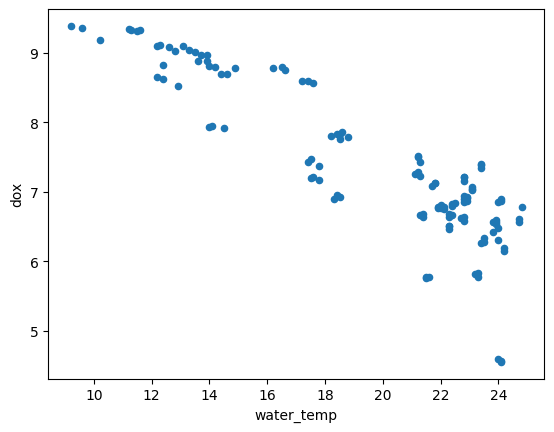

In [203]:
# comparing dissolved oxygen and water temp
df.plot(kind='scatter', x='water_temp', y='dox')
# less dissolved oxygen as the water gets warmer

<Axes: xlabel='conductivity', ylabel='ph'>

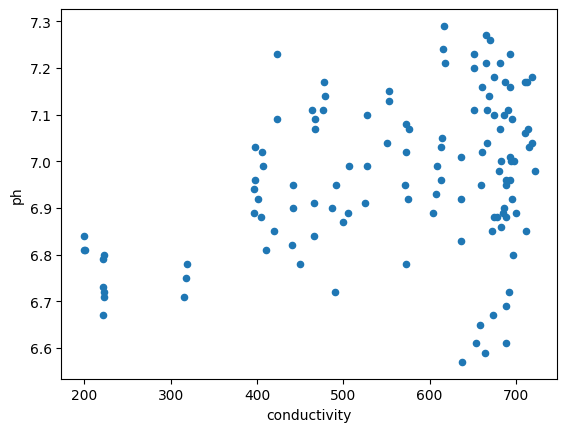

In [204]:
# comparing conductivity and pH
df.plot(kind='scatter', x='conductivity', y='ph')
# some positive correlation between pH and conductivity

<Axes: xlabel='conductivity', ylabel='dox'>

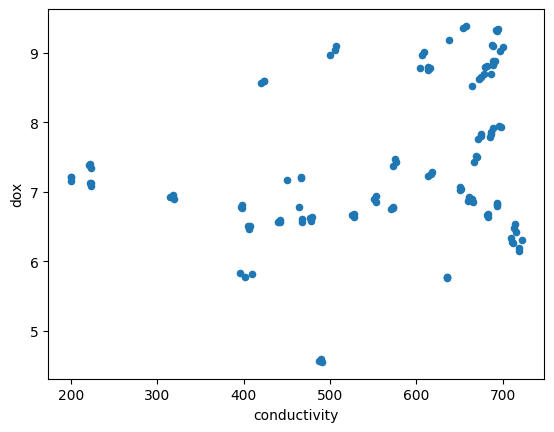

In [205]:
# comparing conductivity and dox
df.plot(kind='scatter', x='conductivity', y='dox')
# doesn't appear to be any correlation between conductivity and dox

<Axes: xlabel='conductivity', ylabel='ph'>

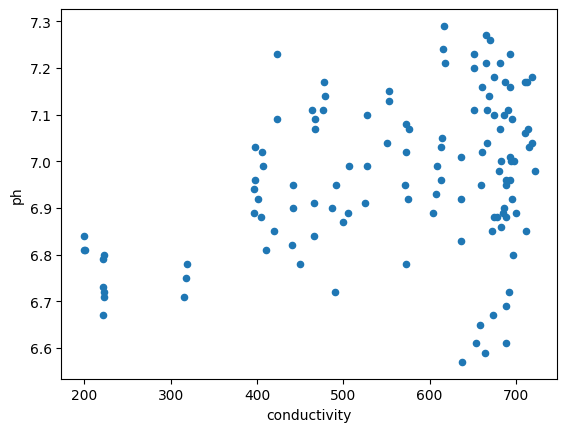

In [206]:
# comparing conductivity and pH
df.plot(kind='scatter', x='conductivity', y='ph')
# some positive correlation between pH and conductivity

In [207]:
# exploring relationship between rain and presence/absence of fecal coliforms
comp = df[['rain24', 'pres']]
comp = comp.dropna()
print(comp)
# fecal coliforms always present in cobbs

    rain24     pres
15     1.0  Present
16     1.0  Present
17     1.0  Present
24     0.0  Present
25     0.0  Present
26     0.0  Present
33     0.0  Present
34     0.0  Present
35     0.0  Present
39     1.0  Present
40     1.0  Present
41     1.0  Present
51     1.0  Present
52     1.0  Present
53     1.0  Present
60     0.0  Present
61     0.0  Present
62     0.0  Present
69     0.0  Present
70     0.0  Present
71     0.0  Present
78     0.0  Present
79     0.0  Present
80     0.0  Present
84     0.0  Present
85     0.0  Present
86     0.0  Present


"\nrain0 = comp[comp['rain24'] == 0]\nprint(rain0['col_count'].describe())\n\n# creating separate box plot for each one\nrain1.boxplot(column='col_count')\n\n\nprint(comp)\ncomp.boxplot(by='rain24')\ncomp.boxplot(column='col_count', by='rain24')\n"

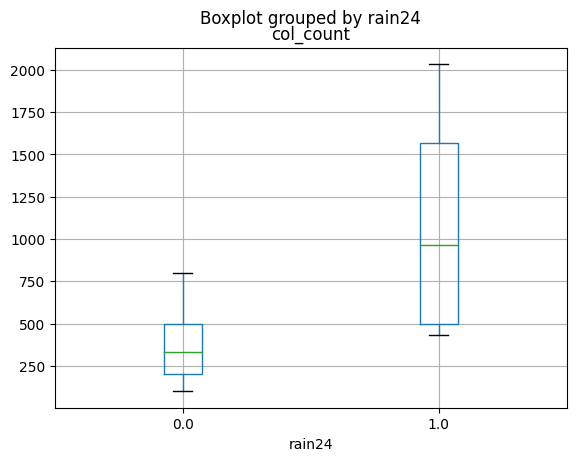

In [208]:
# exploring effect of rain in last 24 hrs on colony counts
comp = df[['rain24', 'col_count']]
comp = comp.dropna()

# TODO add labels, but works for now
comp.boxplot(column='col_count', by='rain24')

# labels not working
# comp.boxplot(column='col_count', by='rain24', columns=['test1', 'test2'])

#labels=['No Rain', 'Rain'])

'''
# if splitting up into two separate dfs for plotting
rain0 = comp[comp['rain24'] == 0]
rain1 = comp[comp['rain24'] == 1]
'''

'''
# sort of works
rain0.boxplot(column='col_count')

rain1.boxplot(column='col_count')
'''

'''
rain0.plot(kind='box');

fig = plt.figure(figsize =(10, 7))
plt.boxplot(['rain0', 'rain1'])
plt.show()
'''


'''
comp.boxplot(column='col_count', by='rain24')
plt.title('Boxplot of col_count for rain24=0 and rain24=1')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by rain24' title
plt.ylabel('col_count')
plt.show()
'''

#comp.groupby('rain24').boxplot()
#comp.groupby('rain24')['col_count'].boxplot()

'''

comp.groupby('rain24').describe()['col_count']

# separating into two dataframes, with and without rain in last 24 hrs
rain1 = comp[comp['rain24'] == 1]
rain1 = rain1['col_count']
print(rain1)
rain1.boxplot()
rain1.describe()['col_count']
'''
'''
rain0 = comp[comp['rain24'] == 0]
print(rain0['col_count'].describe())

# creating separate box plot for each one
rain1.boxplot(column='col_count')


print(comp)
comp.boxplot(by='rain24')
comp.boxplot(column='col_count', by='rain24')
'''

<Axes: title={'center': 'no3n'}, xlabel='rain24'>

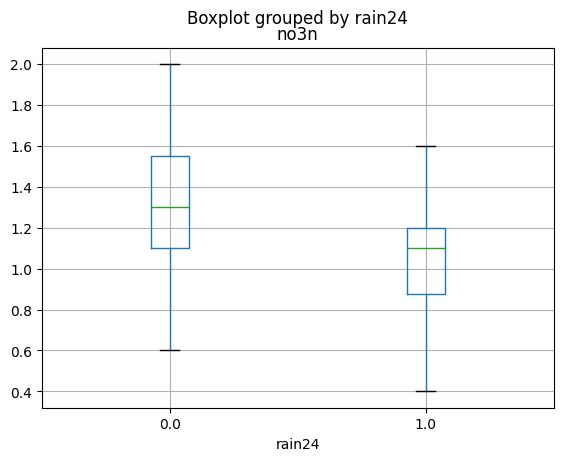

In [209]:
# exploring effect of rain in last 24 hrs on nitrate levels
comp = df[['rain24', 'no3n']]
comp = comp.dropna()

# TODO add labels, but works for now
comp.boxplot(column='no3n', by='rain24')

     rain24  po4p
0       0.0  0.22
1       0.0  0.31
2       0.0  0.19
3       1.0  0.81
4       1.0  0.57
..      ...   ...
118     1.0  0.17
119     1.0  0.13
120     0.0  0.46
121     0.0  0.43
122     0.0  0.18

[122 rows x 2 columns]


<Axes: title={'center': 'po4p'}, xlabel='rain24'>

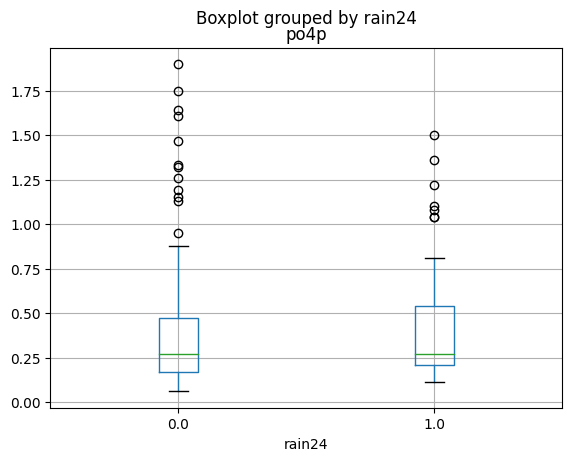

In [210]:
# exploring effect of rain in last 24 hrs on phosphate levels
comp = df[['rain24', 'po4p']]

# TODO there is a max value for po4p, probably should find a better way to handle it than just dropping it
comp = comp.replace('max', np.nan)
comp = comp.dropna()

print(comp)
temp = comp
comp['po4p'] = pd.to_numeric(comp['po4p'], errors='coerce')

# TODO add labels, but works for now
comp.boxplot(column='po4p', by='rain24')

In [211]:
cc1 = df[df['id'] == 'CC-1.1']
cc2 = df[df['id'] == 'CC-1.2']
cc3 = df[df['id'] == 'CC-1.3']

In [212]:
'''
cc1['col_count'] = pd.to_numeric(cc1['col_count'], errors='coerce')
cc2['col_count'] = pd.to_numeric(cc2['col_count'], errors='coerce')
cc3['col_count'] = pd.to_numeric(cc3['col_count'], errors='coerce')
'''

"\ncc1['col_count'] = pd.to_numeric(cc1['col_count'], errors='coerce')\ncc2['col_count'] = pd.to_numeric(cc2['col_count'], errors='coerce')\ncc3['col_count'] = pd.to_numeric(cc3['col_count'], errors='coerce')\n"

In [213]:
'''
cc1['Date'] = pd.to_datetime(cc1['Date'])
cc2['Date'] = pd.to_datetime(cc2['Date'])
cc3['Date'] = pd.to_datetime(cc3['Date'])
'''

"\ncc1['Date'] = pd.to_datetime(cc1['Date'])\ncc2['Date'] = pd.to_datetime(cc2['Date'])\ncc3['Date'] = pd.to_datetime(cc3['Date'])\n"

In [214]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

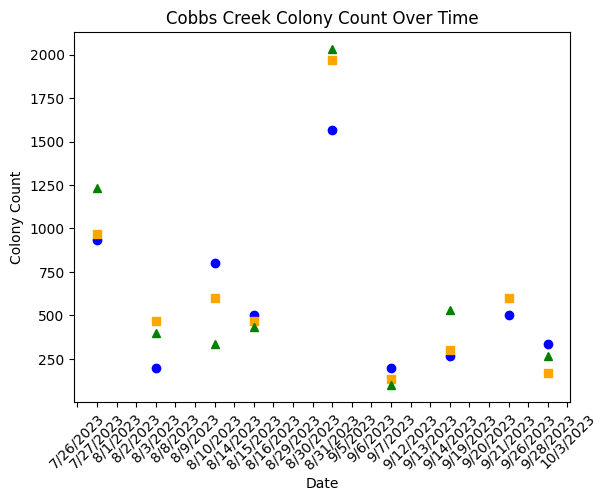

In [215]:
plt.plot(cc1['date'], cc1['col_count'], label='1.1', marker='o', linestyle='-', color='blue')

# Plot with markers and lines for cc2
plt.plot(cc2['date'], cc2['col_count'], label='1.2', marker='s', linestyle='-', color='orange')

# Plot with markers and lines for cc3
plt.plot(cc3['date'], cc3['col_count'], label='1.3', marker='^', linestyle='-', color='green')

plt.plot()

# Add labels and title

plt.xlabel('Date')
plt.ylabel('Colony Count')
plt.title('Cobbs Creek Colony Count Over Time')

plt.xticks(rotation=45)

plt.show()

In [216]:
print(cc1.dtypes)

Unnamed: 0        int64
date             object
time             object
id               object
rain24          float64
water_level      object
water_color      object
water_temp      float64
dox             float64
pressure        float64
conductivity    float64
ph              float64
no3n            float64
po4p             object
pres             object
col_count       float64
dtype: object


In [217]:
print(cc1)

     Unnamed: 0        date     time      id  rain24     water_level  \
0             0   7/18/2023  8:38 AM  CC-1.1     0.0             NaN   
3             3   7/19/2023  8:14 AM  CC-1.1     1.0             NaN   
6             6   7/20/2023  8:25 AM  CC-1.1     1.0             NaN   
9             9   7/25/2023  7:56 AM  CC-1.1     0.0             NaN   
12           12   7/26/2023  8:03 AM  CC-1.1     1.0             NaN   
15           15   7/27/2023  7:49 AM  CC-1.1     1.0             NaN   
18           18    8/1/2023  8:02 AM  CC-1.1     0.0             NaN   
21           21    8/2/2023  8:02 AM  CC-1.1     0.0             NaN   
24           24    8/3/2023  8:08 AM  CC-1.1     0.0             NaN   
27           27    8/8/2023  8:18 AM  CC-1.1     1.0  4: Normal-high   
30           30    8/9/2023  7:49 AM  CC-1.1     0.0       3: Normal   
33           33   8/10/2023  8:11 AM  CC-1.1     0.0       3: Normal   
36           36   8/14/2023  8:13 AM  CC-1.1     1.0       3: No

In [218]:
print(df)

     Unnamed: 0       date     time      id  rain24 water_level water_color  \
0             0  7/18/2023  8:38 AM  CC-1.1     0.0         NaN         NaN   
1             1  7/18/2023  8:39 AM  CC-1.2     0.0         NaN         NaN   
2             2  7/18/2023  8:40 AM  CC-1.3     0.0         NaN         NaN   
3             3  7/19/2023  8:14 AM  CC-1.1     1.0         NaN         NaN   
4             4  7/19/2023  8:15 AM  CC-1.2     1.0         NaN         NaN   
..          ...        ...      ...     ...     ...         ...         ...   
118         118  11/1/2023  7:51 AM  CC-1.2     1.0     5: High       Clear   
119         119  11/1/2023  7:52 AM  CC-1.3     1.0     5: High       Clear   
120         120  11/2/2023  7:50 AM  CC-1.1     0.0     5: High       Clear   
121         121  11/2/2023  7:51 AM  CC-1.2     0.0     5: High       Clear   
122         122  11/2/2023  7:52 AM  CC-1.3     0.0     5: High       Clear   

     water_temp   dox  pressure  conductivity    ph